In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sto_density import *
import time

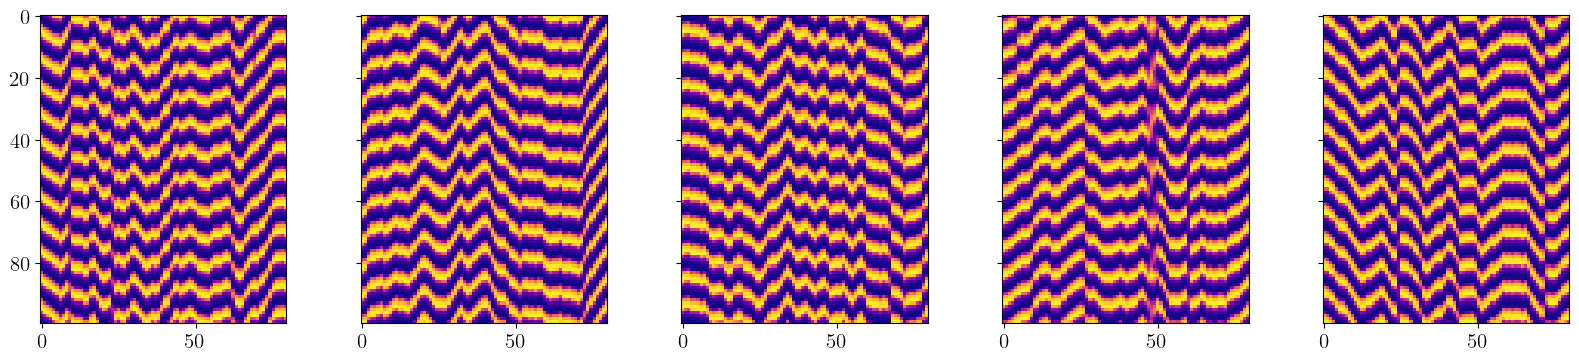

In [32]:
kappa = 1
n = 6
tau = 8.6*2
epsilon = 8.6/2 
mu = 1
nu = 1

tau_sigma = 0.2
epsilon_sigma = 0.1
c1 = 0
c2 = 0.5

T = 1e3
dt = 5e-2
n_batches = int(T)
L = 80

noise_amp = 0 # noise in the initial conditions (doesn't really matter)
seeds = [0, 10, 20, 100, 500] # seed numbers for random number generator
fig, axes = plt.subplots(1, len(seeds), sharex=True, sharey=True, figsize=(20, 4))
for (i, seed) in enumerate(seeds): 
    m = asym_density_field_1D(mu, nu, kappa, n, tau, epsilon, tau_sigma, epsilon_sigma, c1, c2)
    m.initialise(L, T, dt, n_batches, 0, noise_amp, seed)
    m.evolve() 

    axes[i].imshow(m.psi[-100:], cmap='plasma', interpolation='None')
plt.show()

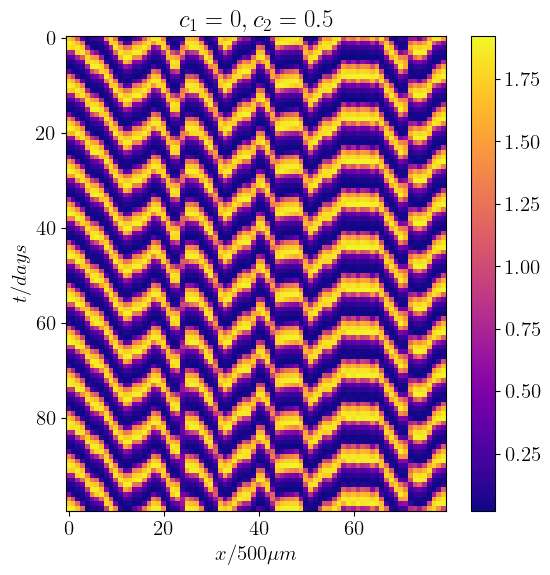

In [33]:
plt.figure(figsize=(6, 6))
plt.rc('font', size=15)
plt.rc('text', usetex=True)

plt.imshow(m.psi[-100:], cmap='plasma', interpolation=None)
plt.colorbar() 
plt.title(r'$c_1={}, c_2={}$'.format(c1, c2))
plt.xlabel(r'$x/500\mu m$')
plt.ylabel(r'$t/days$')
plt.tight_layout()
plt.savefig('Figures/1d_model.png', dpi=300)
plt.show() 